In [10]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [11]:
directories = os.listdir('snapshots/digits/')
prefix = 'snapshots/digits/'
test_losses = []
for dir in directories:
    # check if prefix + dir + '/test_recon_losses.npy' is a file
    if not os.path.isfile(prefix + dir + '/test_recon_losses.npy'):
        continue
    test_loss = np.load(prefix + dir + '/test_recon_losses.npy')
    test_losses.append(test_loss)

In [12]:
n_experts = [1, 2, 3, 5, 7, 10, 12, 15]

In [13]:
losses_experts = {n_experts[i]: test_losses[5*i:5*i+5] for i in range(len(n_experts))}
# For each expert, extract the last entry of each array
losses_experts = {k: [v[-1] for v in losses_experts[k]] for k in losses_experts.keys()}
# Calculate the mean and standard deviation of those entries
losses_experts_stats = {k: {'mean': np.mean(v), 'std': np.std(v)} for k, v in losses_experts.items()}

C:\Users\DELL\AppData\Local\Temp\ipykernel_16860\3379556591.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=n_experts, y=means, marker='o', label='Mean', err_style="bars", ci=None)


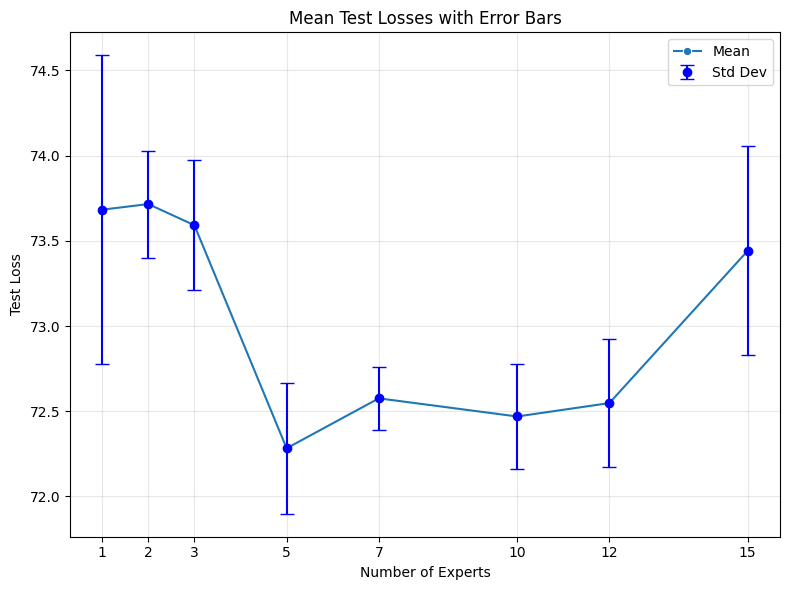

In [14]:
# Extract mean and standard deviation from losses_experts_stats
means = [losses_experts_stats[k]['mean'] for k in n_experts]
stds = [losses_experts_stats[k]['std'] for k in n_experts]

plt.figure(figsize=(8, 6))
sns.lineplot(x=n_experts, y=means, marker='o', label='Mean', err_style="bars", ci=None)
plt.errorbar(n_experts, means, yerr=stds, fmt='o', capsize=5, color='blue', label='Std Dev')


plt.title('Mean Test Losses with Error Bars')
plt.xlabel('Number of Experts')
plt.ylabel('Test Loss')
plt.xticks(n_experts)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Fashion

In [15]:
directories = os.listdir('snapshots/fashion/')
prefix = 'snapshots/fashion/'
test_losses = []
for dir in directories:
    test_loss = np.load(prefix + dir + '/test_recon_losses.npy')
    test_losses.append(test_loss)

In [16]:
n_experts = [1, 2, 3, 5, 7, 10, 12, 15]

In [17]:
losses_experts = {n_experts[i]: test_losses[3*i:3*i+3] for i in range(len(n_experts))}
# For each expert, extract the last entry of each array
losses_experts = {k: [v[-1] for v in losses_experts[k]] for k in losses_experts.keys()}
# Calculate the mean and standard deviation of those entries
losses_experts_stats = {k: {'mean': np.mean(v), 'std': np.std(v)} for k, v in losses_experts.items()}

C:\Users\DELL\AppData\Local\Temp\ipykernel_16860\3291052575.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=n_experts, y=fashion_means, marker='o', label='Mean', err_style="bars", ci=None)


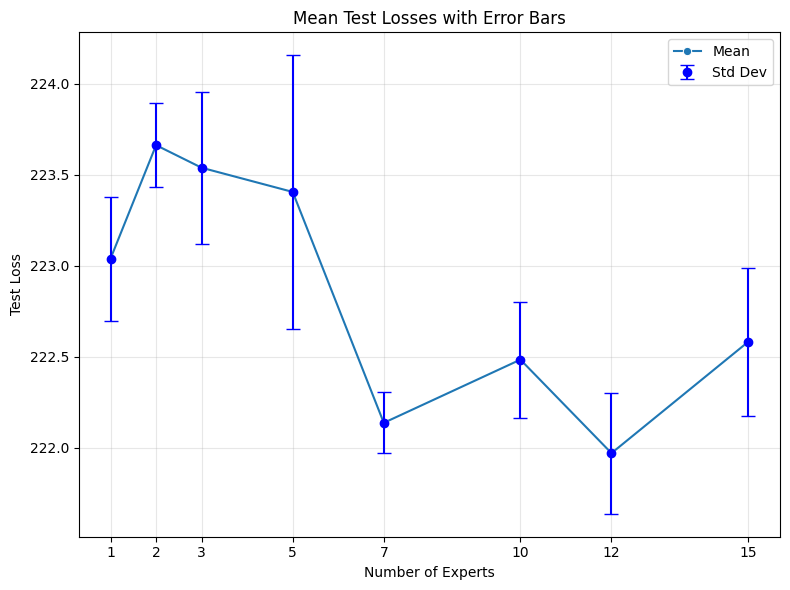

In [18]:
# Extract mean and standard deviation from losses_experts_stats
fashion_means = [losses_experts_stats[k]['mean'] for k in n_experts]
fashion_stds = [losses_experts_stats[k]['std'] for k in n_experts]

plt.figure(figsize=(8, 6))
sns.lineplot(x=n_experts, y=fashion_means, marker='o', label='Mean', err_style="bars", ci=None)
plt.errorbar(n_experts, fashion_means, yerr=fashion_stds, fmt='o', capsize=5, color='blue', label='Std Dev')

plt.title('Mean Test Losses with Error Bars')
plt.xlabel('Number of Experts')
plt.ylabel('Test Loss')
plt.xticks(n_experts)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Dataset size effect

In [19]:
prefix = 'snapshots/digits/dataset_size/moe_ld32_'
n_experts = [1, 2, 3, 5, 7, 10, 12, 15]
percentages = [5, 10, 20, 40, 80]

losses = {}
for percentage in percentages:
    for n_expert in n_experts:
        test_losses = np.load(prefix + f"ne{n_expert}_per{percentage}/test_recon_losses.npy")
        if percentage in losses:
            losses[percentage].append(test_losses[-1])
        else:
            losses[percentage] = [test_losses[-1]]

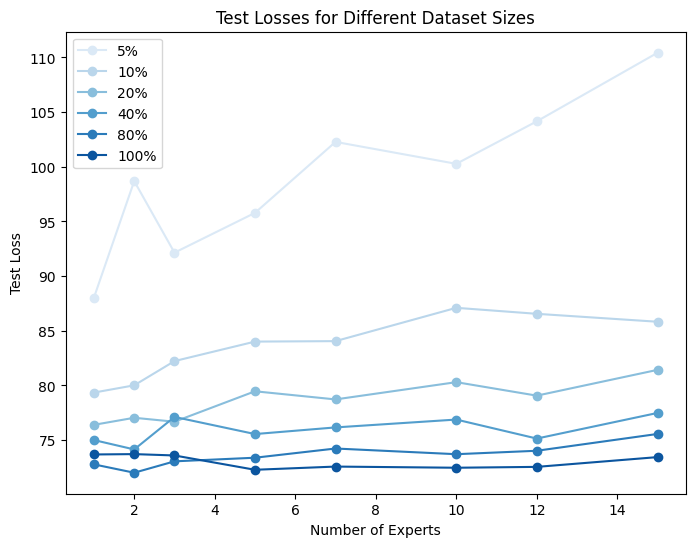

In [20]:
# for each percentage plot one line on the same plot
plt.figure(figsize=(8, 6))
colors = sns.color_palette("Blues", len(percentages) + 1)  # Generate a color palette
for i, percentage in enumerate(percentages):
    plt.plot(n_experts, losses[percentage], marker='o', label=f'{percentage}%', color=colors[i])
plt.plot(n_experts, means, marker='o', label='100%', color=colors[-1])
plt.title('Test Losses for Different Dataset Sizes')
plt.xlabel('Number of Experts')
plt.ylabel('Test Loss')
plt.legend()

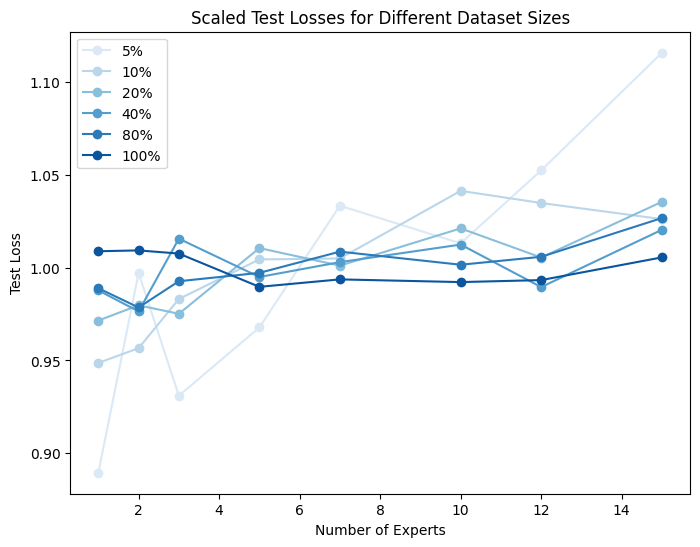

In [21]:
plt.figure(figsize=(8, 6))
colors = sns.color_palette("Blues", len(percentages) + 1)  # Generate a color palette
for i, percentage in enumerate(percentages):
    plt.plot(n_experts, losses[percentage]/np.mean(losses[percentage]), marker='o', label=f'{percentage}%', color=colors[i])
plt.plot(n_experts, means/np.mean(means), marker='o', label='100%', color=colors[-1])
plt.title('Scaled Test Losses for Different Dataset Sizes')
plt.xlabel('Number of Experts')
plt.ylabel('Test Loss')
plt.legend()